# [LEGALST-123] Lab 03: Numpy to Pandas & DataFrame Operations

In [1]:
import datascience
from datascience import *
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import random
from datetime import datetime

# Introduction
In this lab, we'll be emphasizing a shift from the `datascience` library utilized in Data 8 to the `pandas` library, a more common and advanced data analysis and science library. We'll be using the Nashville police stops sample dataset for this lab. The objectives of this lab are as follows:

- **Understanding the Equivalent Methods of `datascience` in `pandas`**: 
    - We will be showcasing some of the major functionalities you learned about in Data 8 from the `datascience` library and comparing them to the similar methods in `pandas`.

- **Dealing with Null Values**:
    - Missing values in data is very common when doing data analysis, so we'll be using our new skills in the `pandas` library to deal with these missing values in our data.

- **Visualizations**: 
    - We'll be introducing some simple visualizations that you can create with the `matplotlib.pyplot` library. In the next lab, we'll build on some of these basic techniques to learn more advanced ones.

<br>

<hr style="border: 1px solid #fdb515;" />

<br>

## From Numpy and `datascience` to `pandas`

### `pandas` Data Structures Overview
#### DataFrame, Series, Index

In Data 8, you learned to represent data with columns and rows in a Table, which is part of the `datascience` library. Recall functions and methods in the Data 8 Python reference here: https://www.data8.org/fa23/reference/.

Pandas is another Python library that is commonly used in industry. We will be using Pandas in Legal Studies 123. The Pandas version of a Table is a DataFrame. See all of the cool things you can do with a Pandas DataFrame here: https://pandas.pydata.org/docs/reference/frame.html.

**How is a DataFrame different from a Table?**
- A column in a DataFrame is a Series, while a column in a Table is an array.
- A DataFrame has an index (in bold on the left of the table).

**What is a Series?**
- A one-dimensional array-like object that contains:
    - a sequence of values of the same type
    - a sequence of labels (called the index)
- It is different from an array because it has an explicitly defined index associated with the values, whereas an array has an implicitly defined integer index associated with the values.

**What is an index?**
- Indeces are row labels.
- They can be numeric or non-numeric.
- Indeces can act as a row number, where all indeces are unique.
- They can also be named and not unique (for example, if your index represents a year or a name that has multiple rows in the DataFrame).

### Data Exploration and Manipulation
**I. Reading in data from a csv file**

**II. Finding number of rows and columns**

**III. Indexing**

**IV. Filtering**

**V. Grouping**

#### I. Reading in data from a csv file
- `datascience` uses `Table.read_table`
- Pandas uses `pd.read_csv`

**Disclaimer**: The Nashville police stop dataset is very large. In the following exercises, we will be performing operations in Data 8's Numpy/ `datascience` and Pandas to illustrate the translation between the two. If we try to load in the full dataset in this notebook as a `datascience` Table and a Pandas dataframe, our kernel will crash. So, for this notebook, we are loading in just a **random sample** of the dataset in both Numpy/ `datascience` and Pandas.

In [2]:
datascience_stops = Table.read_table("https://github.com/ds-modules/data/raw/main/nashville_sample.csv", index_col=0)
datascience_stops.show(5)

index,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,subject_age,subject_race,subject_sex,officer_id_hash,type,violation,arrest_made,citation_issued,warning_issued,outcome,contraband_found,contraband_drugs,contraband_weapons,frisk_performed,search_conducted,search_person,search_vehicle,search_basis,reason_for_stop,vehicle_registration_state,notes,raw_verbal_warning_issued,raw_written_warning_issued,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
1840907,93347,2010-04-18,13140,"BURGESS AVE & WHITE BRIDGE PIKE, NASHVILLE, TN, 37209",36.145,-86.858,1,5103,113,23,white,male,88ef34d431,vehicular,moving traffic violation,True,False,False,arrest,nan,nan,nan,False,False,False,False,nan,moving traffic violation,TN,nan,False,0,False,nan,N,False,False,False,False,False,False,False
492044,2001428,2015-01-19,19920,"DUE WEST AVE W & S GRAYCROFT AVE, MADISON, TN, 37115",36.2492,-86.7345,7,1797,723,45,black,female,2d9b91c2d2,vehicular,vehicle equipment violation,False,False,True,warning,nan,nan,nan,False,False,False,False,nan,vehicle equipment violation,TN,tail light out,True,0,False,0,N,False,False,False,False,False,False,False
431170,1996331,2015-01-15,1020,"S GALLATIN PIKE & MADISON BLVD, MADISON, TN, 37115",36.255,-86.7152,7,1623,711,21,black,female,576170def4,vehicular,moving traffic violation,False,False,True,warning,nan,nan,nan,False,False,False,False,nan,moving traffic violation,TN,nan,True,0,False,0,N,False,False,False,False,False,False,False
2066423,1319451,2013-05-17,62760,"CHARLOTTE PIKE & W HILLWOOD DR, NASHVILLE, TN, 37209",36.1391,-86.8805,1,5009,123,35,white,male,b91c7a6f67,vehicular,vehicle equipment violation,False,False,True,warning,nan,nan,nan,False,False,False,False,nan,vehicle equipment violation,TN,nan,True,0,False,0,N,False,False,False,False,False,False,False
2899480,201349,2010-09-01,28140,"BELL RD & DODSON CHAPEL RD, HERMITAGE, TN, 37076",36.1633,-86.6131,5,9501,521,53,white,female,fc43f6017d,vehicular,moving traffic violation,False,False,True,warning,nan,nan,nan,False,False,False,False,nan,moving traffic violation,TN,nan,True,0,False,nan,N,False,False,False,False,False,False,False


In [3]:
pandas_stops = pd.read_csv("https://github.com/ds-modules/data/raw/main/nashville_sample.csv", index_col=0)
pandas_stops.head(5)

,index,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,...,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
0,1840907,93347,2010-04-18,13140.0,"BURGESS AVE & WHITE BRIDGE PIKE, NASHVILLE, TN...",36.145004,-86.857970,1.0,5103.0,113.0,...,False,NaN,N,False,False,False,False,False,False,False
1,492044,2001428,2015-01-19,19920.0,"DUE WEST AVE W & S GRAYCROFT AVE, MADISON, TN,...",36.249187,-86.734459,7.0,1797.0,723.0,...,False,False,N,False,False,False,False,False,False,False
2,431170,1996331,2015-01-15,1020.0,"S GALLATIN PIKE & MADISON BLVD, MADISON, TN, 3...",36.254979,-86.715246,7.0,1623.0,711.0,...,False,False,N,False,False,False,False,False,False,False
3,2066423,1319451,2013-05-17,62760.0,"CHARLOTTE PIKE & W HILLWOOD DR, NASHVILLE, TN,...",36.139093,-86.880533,1.0,5009.0,123.0,...,False,False,N,False,False,False,False,False,False,False
4,2899480,201349,2010-09-01,28140.0,"BELL RD & DODSON CHAPEL RD, HERMITAGE, TN, 37076",36.163310,-86.613147,5.0,9501.0,521.0,...,False,NaN,N,False,False,False,False,False,False,False


#### II. Finding number of rows and columns
Let's remind ourselves of how we found the number of rows and columns in `datascience`.
- `datascience` uses `tbl.num_rows` to find the number of rows and `tbl.num_columns`to find the number of columns


In [4]:
# Number of rows in Table
datascience_stops.num_rows

1000

In [5]:
# Number of columns in Table
datascience_stops.num_columns

43

Now let's do this with pandas.

✅ Looking at the reference sheet, what can we do to return the number of rows and columns of the dataframe?

Note that unlike `datascience`, pandas doesn't have a specific function that returns the number of rows or number of columns by itself.

In [6]:
## Solution ##
pandas_stops.shape

(1000, 43)

✅ Since it returns a tuple, how would you extract the number of rows and columns? Try it out yourself.

In [7]:
## Solution ##
num_rows = pandas_stops.shape[0]
num_columns = pandas_stops.shape[1]

print("num_rows: ", num_rows, "num_columns: ", num_columns)

num_rows:  1000 num_columns:  43


*Note: Because of the way we sampled earlier to make the dataset smaller, the Table and the DataFrame do not have the same exact number of rows.*

#### III. Indexing
- `datascience` Tables:
    - Row indexing: `tbl.take(row_indeces)`
    - Column indexing: `tbl.column(column_name_or_index)` and `tbl.select(column_name_or_index`

- Pandas DataFrames:
    - Label based extractor for columns and rows: `df.loc[row_labels, column_labels]`
    - Index based extractor for columns and rows: `.iloc[row_integers, column_integers]`
    - Context based extraction `[ ]`

**`datascience`**

In [8]:
# Extracting the second row of the Table.
# This gives us a new table with just the single row that we selected.
datascience_stops.take(2)

index,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,subject_age,subject_race,subject_sex,officer_id_hash,type,violation,arrest_made,citation_issued,warning_issued,outcome,contraband_found,contraband_drugs,contraband_weapons,frisk_performed,search_conducted,search_person,search_vehicle,search_basis,reason_for_stop,vehicle_registration_state,notes,raw_verbal_warning_issued,raw_written_warning_issued,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
431170,1996331,2015-01-15,1020,"S GALLATIN PIKE & MADISON BLVD, MADISON, TN, 37115",36.255,-86.7152,7,1623,711,21,black,female,576170def4,vehicular,moving traffic violation,False,False,True,warning,nan,nan,nan,False,False,False,False,nan,moving traffic violation,TN,nan,True,0,False,0,N,False,False,False,False,False,False,False


In [9]:
# Extracting the first through fifth rows of the Table.
# This gives us a new table with just the first five rows that we selected.
datascience_stops.take(np.arange(0,3))

index,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,subject_age,subject_race,subject_sex,officer_id_hash,type,violation,arrest_made,citation_issued,warning_issued,outcome,contraband_found,contraband_drugs,contraband_weapons,frisk_performed,search_conducted,search_person,search_vehicle,search_basis,reason_for_stop,vehicle_registration_state,notes,raw_verbal_warning_issued,raw_written_warning_issued,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
1840907,93347,2010-04-18,13140,"BURGESS AVE & WHITE BRIDGE PIKE, NASHVILLE, TN, 37209",36.145,-86.858,1,5103,113,23,white,male,88ef34d431,vehicular,moving traffic violation,True,False,False,arrest,nan,nan,nan,False,False,False,False,nan,moving traffic violation,TN,nan,False,0,False,nan,N,False,False,False,False,False,False,False
492044,2001428,2015-01-19,19920,"DUE WEST AVE W & S GRAYCROFT AVE, MADISON, TN, 37115",36.2492,-86.7345,7,1797,723,45,black,female,2d9b91c2d2,vehicular,vehicle equipment violation,False,False,True,warning,nan,nan,nan,False,False,False,False,nan,vehicle equipment violation,TN,tail light out,True,0,False,0,N,False,False,False,False,False,False,False
431170,1996331,2015-01-15,1020,"S GALLATIN PIKE & MADISON BLVD, MADISON, TN, 37115",36.255,-86.7152,7,1623,711,21,black,female,576170def4,vehicular,moving traffic violation,False,False,True,warning,nan,nan,nan,False,False,False,False,nan,moving traffic violation,TN,nan,True,0,False,0,N,False,False,False,False,False,False,False


In [10]:
# This gives us a copy of the Table with only the column we selected.
datascience_stops.select("location")

location
"BURGESS AVE & WHITE BRIDGE PIKE, NASHVILLE, TN, 37209"
"DUE WEST AVE W & S GRAYCROFT AVE, MADISON, TN, 37115"
"S GALLATIN PIKE & MADISON BLVD, MADISON, TN, 37115"
"CHARLOTTE PIKE & W HILLWOOD DR, NASHVILLE, TN, 37209"
"BELL RD & DODSON CHAPEL RD, HERMITAGE, TN, 37076"
"3RD AVE S & ASH ST, NASHVILLE, TN, 37210"
"BELL RD & DODSON CHAPEL RD, HERMITAGE, TN, 37076"
"W TRINITY LN & BAPTIST WORLD CENTER DR, NASHVILLE, TN, 37207"
"6TH AVE S & LAFAYETTE ST, NASHVILLE, TN, 37203"
"BRILEY PKWY N & MCGAVOCK PIKE, NASHVILLE, TN, 37214"


**Pandas**




##### `.loc` lets us extract data with specific column or index LABELS.
We can extract specific rows and columns by passing in lists to the row and column arguments.

In [11]:
#Extracting rows 1, 3, and 5 with only the "location" and "subject_age" columns
#These are list arguments to .loc.
pandas_stops.loc[[1, 3, 5], ["location", "subject_age"]]

,location,subject_age
1,"DUE WEST AVE W & S GRAYCROFT AVE, MADISON, TN,...",45.0
3,"CHARLOTTE PIKE & W HILLWOOD DR, NASHVILLE, TN,...",35.0
5,"3RD AVE S & ASH ST, NASHVILLE, TN, 37210",26.0


We can also use slicing if we want to extract X through X rows or columns. Slicing is inclusive when using `.loc`.

✅ Using `.loc`, filter the table so that you only have rows 1, 2, 3, 4, 5 and columns starting at "date" to "location".


In [12]:
## SOLUTION ##
pandas_stops.loc[1:5, "date":"location"]

,date,time,location
1,2015-01-19,19920.0,"DUE WEST AVE W & S GRAYCROFT AVE, MADISON, TN,..."
2,2015-01-15,1020.0,"S GALLATIN PIKE & MADISON BLVD, MADISON, TN, 3..."
3,2013-05-17,62760.0,"CHARLOTTE PIKE & W HILLWOOD DR, NASHVILLE, TN,..."
4,2010-09-01,28140.0,"BELL RD & DODSON CHAPEL RD, HERMITAGE, TN, 37076"
5,2012-12-13,67560.0,"3RD AVE S & ASH ST, NASHVILLE, TN, 37210"


We can also pass in only a single row or column.

✅ Just like you did above, extract rows from 1 to 5, but this time with only the "location" column.

In [13]:
## SOLUTION ##
pandas_stops.loc[1:5, "location"]

1    DUE WEST AVE W & S GRAYCROFT AVE, MADISON, TN,...
2    S GALLATIN PIKE & MADISON BLVD, MADISON, TN, 3...
3    CHARLOTTE PIKE & W HILLWOOD DR, NASHVILLE, TN,...
4     BELL RD & DODSON CHAPEL RD, HERMITAGE, TN, 37076
5             3RD AVE S & ASH ST, NASHVILLE, TN, 37210
Name: location, dtype: object

When we pass in only a single column name into `.loc`, it returns a Series, not a DataFrame. A Series is a one-dimensional array-like object that contains:
- a sequence of values of the same type
- a sequence of labels (called the index)

To extract *all* rows or *all* columns, we use a colon.

In [14]:
# All rows for only the columns "location" and "subject age"
pandas_stops.loc[:, ["location", "subject_age"]]

,location,subject_age
0,"BURGESS AVE & WHITE BRIDGE PIKE, NASHVILLE, TN...",23.0
1,"DUE WEST AVE W & S GRAYCROFT AVE, MADISON, TN,...",45.0
2,"S GALLATIN PIKE & MADISON BLVD, MADISON, TN, 3...",21.0
3,"CHARLOTTE PIKE & W HILLWOOD DR, NASHVILLE, TN,...",35.0
4,"BELL RD & DODSON CHAPEL RD, HERMITAGE, TN, 37076",53.0
...,...,...
995,"17TH AVE S & BROADWAY, NASHVILLE, TN, 37203",26.0
996,"LINCOLN ST & TRIMBLE ST, NASHVILLE, TN, 37210",41.0
997,"MURFREESBORO PIKE & PIN HOOK RD, ANTIOCH, TN, ...",44.0
998,"819 S GALLATIN PIKE, MADISON, TN, 37115",29.0


##### `.iloc` lets us specify the *integers* of rows and columns we wish to extract.
This means we are extracting according to data according to its *position* in the DataFrame. Like `.loc`, we can pass in a list, a slice, or a single value into `.iloc`.

We can pass in lists to `.iloc`.

In [15]:
# Extracting rows at positions 1, 2, and 3 and the columns at positions 0, 1, and 2
pandas_stops.iloc[[1,2,3], [0,1,2]]

,index,raw_row_number,date
1,492044,2001428,2015-01-19
2,431170,1996331,2015-01-15
3,2066423,1319451,2013-05-17


✅ Now, still using `.iloc`, return the same dataframe from above, without passing lists into `.iloc`.

Hint 1: You can do slicing in `.iloc`.

Hint 2: Remember that `.iloc` is right-exclusive.

In [16]:
### SOLUTION ###
pandas_stops.iloc[1:4, 0:3]

,index,raw_row_number,date
1,492044,2001428,2015-01-19
2,431170,1996331,2015-01-15
3,2066423,1319451,2013-05-17


We can pass in single values into `.iloc`, which again returns a Series (not a DataFrame).

In [17]:
# Extracting rows at positions 1, 2, and 3 and just column at position 3.
pandas_stops.iloc[[1,2,3], 3]

1    19920.0
2     1020.0
3    62760.0
Name: time, dtype: float64

In [18]:
# Extracting a single value by selecting a single row in position 1 and a single column in position 1.
pandas_stops.iloc[1, 1]

'2001428'

`[ ]` is context-dependent. Unlike `.loc` (which selects items by label with the first argument being rows and the second argument being columns) and `.iloc` (which selects items by integer with the first argument being rows and the second argument being columns), `[ ]` only takes ONE argument.

The argument can be a slice of row numbers. Note that it is right exclusive. (This is like `datascience`'s `tbl.take()`)

In [19]:
# Grabbing rows 1 through 3
pandas_stops[1:4]

,index,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,...,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
1,492044,2001428,2015-01-19,19920.0,"DUE WEST AVE W & S GRAYCROFT AVE, MADISON, TN,...",36.249187,-86.734459,7.0,1797.0,723.0,...,False,False,N,False,False,False,False,False,False,False
2,431170,1996331,2015-01-15,1020.0,"S GALLATIN PIKE & MADISON BLVD, MADISON, TN, 3...",36.254979,-86.715246,7.0,1623.0,711.0,...,False,False,N,False,False,False,False,False,False,False
3,2066423,1319451,2013-05-17,62760.0,"CHARLOTTE PIKE & W HILLWOOD DR, NASHVILLE, TN,...",36.139093,-86.880533,1.0,5009.0,123.0,...,False,False,N,False,False,False,False,False,False,False


The argument can also be a list of column labels (all rows kept but only certain columns selected). This is like `datascience`'s `tbl.select()`.

In [20]:
pandas_stops[["date", "time", "location"]]

,date,time,location
0,2010-04-18,13140.0,"BURGESS AVE & WHITE BRIDGE PIKE, NASHVILLE, TN..."
1,2015-01-19,19920.0,"DUE WEST AVE W & S GRAYCROFT AVE, MADISON, TN,..."
2,2015-01-15,1020.0,"S GALLATIN PIKE & MADISON BLVD, MADISON, TN, 3..."
3,2013-05-17,62760.0,"CHARLOTTE PIKE & W HILLWOOD DR, NASHVILLE, TN,..."
4,2010-09-01,28140.0,"BELL RD & DODSON CHAPEL RD, HERMITAGE, TN, 37076"
...,...,...,...
995,2012-07-01,6360.0,"17TH AVE S & BROADWAY, NASHVILLE, TN, 37203"
996,2012-01-10,65220.0,"LINCOLN ST & TRIMBLE ST, NASHVILLE, TN, 37210"
997,2016-08-12,78420.0,"MURFREESBORO PIKE & PIN HOOK RD, ANTIOCH, TN, ..."
998,2011-08-24,11460.0,"819 S GALLATIN PIKE, MADISON, TN, 37115"


The argument can also be a single column, which returns a Series. This is like `datascience`'s `tbl.column()`.

In [21]:
pandas_stops["date"]

0      2010-04-18
1      2015-01-19
2      2015-01-15
3      2013-05-17
4      2010-09-01
          ...    
995    2012-07-01
996    2012-01-10
997    2016-08-12
998    2011-08-24
999    2012-09-12
Name: date, Length: 1000, dtype: object

#### IV. Filtering

To filter a table such that we only keep certain values in it based on a given condition:
- `datascience` uses `tbl.where` with a predicate (i.e. `are.below(x)`, `are.between_or_equal_to(x,y)`, etc.)
- There are multiple ways to filter a Pandas DataFrame. We could use the `.loc` and `.iloc` functions above, but we could also use brackets (`df[df[condition]`) or the `df.query('column_name condition')` function.

**`datascience`**

For the full list of `tbl.where` predicates, see: https://www.data8.org/fa23/reference/

In [22]:
# Return a copy of the Table with only the stops where the person was older than 35.
datascience_stops.where("subject_age", are.above(35))

index,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,subject_age,subject_race,subject_sex,officer_id_hash,type,violation,arrest_made,citation_issued,warning_issued,outcome,contraband_found,contraband_drugs,contraband_weapons,frisk_performed,search_conducted,search_person,search_vehicle,search_basis,reason_for_stop,vehicle_registration_state,notes,raw_verbal_warning_issued,raw_written_warning_issued,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
492044,2001428,2015-01-19,19920,"DUE WEST AVE W & S GRAYCROFT AVE, MADISON, TN, 37115",36.2492,-86.7345,7,1797,723,45,black,female,2d9b91c2d2,vehicular,vehicle equipment violation,False,False,True,warning,nan,nan,nan,False,False,False,False,nan,vehicle equipment violation,TN,tail light out,True,0,False,0,N,False,False,False,False,False,False,False
2899480,201349,2010-09-01,28140,"BELL RD & DODSON CHAPEL RD, HERMITAGE, TN, 37076",36.1633,-86.6131,5,9501,521,53,white,female,fc43f6017d,vehicular,moving traffic violation,False,False,True,warning,nan,nan,nan,False,False,False,False,nan,moving traffic violation,TN,nan,True,0,False,nan,N,False,False,False,False,False,False,False
1036418,2826256,2017-09-25,75600,"6TH AVE S & LAFAYETTE ST, NASHVILLE, TN, 37203",36.1533,-86.7757,4,4039,425,58,white,female,a7a90aec7d,vehicular,moving traffic violation,False,False,True,warning,nan,nan,nan,False,False,False,False,nan,moving traffic violation,TN,nan,True,nan,False,0,N,False,False,False,False,False,False,False
889536,2679164,2017-02-24,33600,"BRILEY PKWY N & MCGAVOCK PIKE, NASHVILLE, TN, 37214",36.2173,-86.6933,5,92941,515,44,white,female,53d89d125a,vehicular,moving traffic violation,False,False,True,warning,nan,nan,nan,False,False,False,False,nan,moving traffic violation,KY,nan,True,nan,False,0,N,False,False,False,False,False,False,False
2200690,104718,2010-05-06,47280,"ELYSIAN FIELDS RD & NOLENSVILLE PIKE, NASHVILLE, TN, 37211",36.0869,-86.7302,nan,nan,nan,37,other,male,5966fe24c8,vehicular,moving traffic violation,False,True,False,citation,nan,nan,nan,False,False,False,False,nan,moving traffic violation,TN,nan,False,0,True,nan,N,False,False,False,False,False,False,False
1083267,2873186,2017-12-12,78180,"MILLWOOD DR & MURFREESBORO PIKE, NASHVILLE, TN, 37217",36.1295,-86.7147,5,8815,531,43,asian/pacific islander,male,97117e47ab,vehicular,vehicle equipment violation,False,False,True,warning,nan,nan,nan,False,False,False,False,nan,vehicle equipment violation,TN,nan,True,nan,False,0,N,False,False,False,False,False,False,False
877329,2666942,2017-02-09,12960,"BRICK CHURCH PIKE & W TRINITY LN, NASHVILLE, TN, 37207",36.2067,-86.778,6,3007,621,41,black,male,81ffb8487e,vehicular,vehicle equipment violation,False,False,True,warning,nan,nan,nan,False,False,False,False,nan,vehicle equipment violation,TN,nan,True,nan,False,0,N,False,False,False,False,False,False,False
337803,1522789,2013-11-22,57000,"26TH AVE N & CHARLOTTE AVE, NASHVILLE, TN, 37209",36.1545,-86.8155,6,5315,615,62,black,male,41a15946a7,vehicular,registration,False,False,True,warning,nan,nan,nan,False,False,False,False,nan,registration,TN,nan,True,0,False,0,N,False,False,False,False,False,False,False
1563352,2055265,2015-03-13,31140,"49TH AVE N & CHARLOTTE AVE, NASHVILLE, TN, 37209",36.1521,-86.846,1,5129,113,53,black,female,2699ef149f,vehicular,vehicle equipment violation,False,False,True,warning,nan,nan,nan,False,False,False,False,nan,vehicle equipment violation,TN,nan,True,0,False,0,N,False,False,False,False,False,False,False
2106123,1720890,2014-05-02,32460,"BRICK CHURCH PIKE & FERNCO DR, NASHVILLE, TN, 37207",36.2199,-86.7823,6,3047,621,46,white,male,0c43101255,vehicular,moving traffic violation,False,False,True,warning,nan,nan,nan,False,False,False,False,nan,moving traffic violation,TN,nan,True,0,False,0,N,False,False,False,False,False,False,Fal

**Pandas**

*   We can use brackets to filter a dataframe on a certain condition. Available operators are == (equal), != (not equal to), >, >=, <, and <=.
*   For instance, `df[df[column_name] condition]` will return a filtered version of the dataframe where that column satisfies the condition.

In [23]:
# Return a dataframe with only the stops where the person was older than 35,
# using brackets: df[df[column_name] condition]
filtered = pandas_stops[pandas_stops["subject_age"] > 35]
filtered.head(3)

,index,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,...,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
1,492044,2001428,2015-01-19,19920.0,"DUE WEST AVE W & S GRAYCROFT AVE, MADISON, TN,...",36.249187,-86.734459,7.0,1797.0,723.0,...,False,False,N,False,False,False,False,False,False,False
4,2899480,201349,2010-09-01,28140.0,"BELL RD & DODSON CHAPEL RD, HERMITAGE, TN, 37076",36.163310,-86.613147,5.0,9501.0,521.0,...,False,NaN,N,False,False,False,False,False,False,False
8,1036418,2826256,2017-09-25,75600.0,"6TH AVE S & LAFAYETTE ST, NASHVILLE, TN, 37203",36.153309,-86.775682,4.0,4039.0,425.0,...,False,False,N,False,False,False,False,False,False,False


* To filter by multiple conditions, use the & symbol between conditional statements.

✅ Filter the dataframe so that it has only the stops where the person was older than 35 and the person was white.

In [24]:
### SOLUTION ###
filtered = pandas_stops[(pandas_stops["subject_age"] > 35) & (pandas_stops["subject_race"]=="white")]
filtered.head(5)

,index,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,...,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
4,2899480,201349,2010-09-01,28140.0,"BELL RD & DODSON CHAPEL RD, HERMITAGE, TN, 37076",36.163310,-86.613147,5.0,9501.0,521.0,...,False,NaN,N,False,False,False,False,False,False,False
8,1036418,2826256,2017-09-25,75600.0,"6TH AVE S & LAFAYETTE ST, NASHVILLE, TN, 37203",36.153309,-86.775682,4.0,4039.0,425.0,...,False,False,N,False,False,False,False,False,False,False
9,889536,2679164,2017-02-24,33600.0,"BRILEY PKWY N & MCGAVOCK PIKE, NASHVILLE, TN, ...",36.217310,-86.693259,5.0,92941.0,515.0,...,False,False,N,False,False,False,False,False,False,False
27,2106123,1720890,2014-05-02,32460.0,"BRICK CHURCH PIKE & FERNCO DR, NASHVILLE, TN, ...",36.219947,-86.782303,6.0,3047.0,621.0,...,False,False,N,False,False,False,False,False,False,False
28,2804967,993808,2012-08-27,68820.0,"EDWARDS AVE & HART LN, NASHVILLE, TN, 37216",36.216866,-86.739579,2.0,1847.0,225.0,...,False,False,N,False,False,False,False,False,False,False


We can also use the `df.query` function to do the same things as above. We put everything in quotes inside of the query function.

In [25]:
# Filtering the dataframe with only the stops where the person was older than 35, using the query function
filtered = pandas_stops.query("subject_age > 35")
filtered

,index,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,...,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
1,492044,2001428,2015-01-19,19920.0,"DUE WEST AVE W & S GRAYCROFT AVE, MADISON, TN,...",36.249187,-86.734459,7.0,1797.0,723.0,...,False,False,N,False,False,False,False,False,False,False
4,2899480,201349,2010-09-01,28140.0,"BELL RD & DODSON CHAPEL RD, HERMITAGE, TN, 37076",36.163310,-86.613147,5.0,9501.0,521.0,...,False,NaN,N,False,False,False,False,False,False,False
8,1036418,2826256,2017-09-25,75600.0,"6TH AVE S & LAFAYETTE ST, NASHVILLE, TN, 37203",36.153309,-86.775682,4.0,4039.0,425.0,...,False,False,N,False,False,False,False,False,False,False
9,889536,2679164,2017-02-24,33600.0,"BRILEY PKWY N & MCGAVOCK PIKE, NASHVILLE, TN, ...",36.217310,-86.693259,5.0,92941.0,515.0,...,False,False,N,False,False,False,False,False,False,False
13,2200690,104718,2010-05-06,47280.0,"ELYSIAN FIELDS RD & NOLENSVILLE PIKE, NASHVILL...",36.086891,-86.730210,NaN,NaN,NaN,...,True,NaN,N,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,2138911,884262,2012-05-26,67200.0,"HARDING PL & NOLENSVILLE PIKE, NASHVILLE, TN, ...",36.079630,-86.726407,8.0,8501.0,831.0,...,False,False,N,False,False,False,False,False,False,False
993,276405,1088845,2012-11-16,68400.0,"ELM ST & LAFAYETTE ST, NASHVILLE, TN, 37203",36.152611,-86.773667,4.0,4039.0,425.0,...,False,False,N,False,False,False,False,False,False,False
994,703996,1184847,2013-01-25,40860.0,"BRILEY PKWY N & ELM HILL PIKE, NASHVILLE, TN, ...",36.153834,-86.685459,5.0,9196.0,513.0,...,False,False,N,False,False,False,False,False,False,False
996,211168,1145747,2012-01-10,65220.0,"LINCOLN ST & TRIMBLE ST, NASHVILLE, TN, 37210",36.146199,-86.760518,3.0,8145.0,311.0,...,True,True,N,True,True,True,False,False,False,False


#### V. Grouping

To group rows by unique values or combinations of values:
- `datascience` uses `tbl.group(column_or_columns, function)`
    - By default, the function used is count (if nothing else is passed in).
- Pandas uses `df.groupby(column_name).function()`

[Here's an additional resource](https://www.data8.org/interactive_table_functions/) from Data 8 for understanding how grouping (as well as pivoting) works!

In [26]:
# Grouping the table by race (gives us a table that counts the number of stops for each precinct by defualt)
ds_race_grouped = datascience_stops.group("subject_race")
ds_race_grouped

subject_race,count
asian/pacific islander,20
black,389
hispanic,55
other,6
unknown,12
white,518


In [27]:
# Note: to sort a table, we use tbl.sort(column_name, descending=True/False)
ds_race_sorted = ds_race_grouped.sort("count", descending=True)
ds_race_sorted

subject_race,count
white,518
black,389
hispanic,55
asian/pacific islander,20
unknown,12
other,6


Now let's do this in pandas.

In [28]:
# Grouping the dataframe by precinct
race_pandas_series = pandas_stops.groupby("subject_race").size()
race_pandas_series

subject_race
asian/pacific islander     20
black                     389
hispanic                   55
other                       6
unknown                    12
white                     518
dtype: int64

Notice how it returns a Series. To convert the returned series into a dataframe, we're going to be using `.to_frame()`. We also rename this column to "Count" using `.rename()` .

In [29]:
race_grouped_frame = race_pandas_series.to_frame().rename({0: "Count"}, axis = 1)
race_grouped_frame

,Count
subject_race,
asian/pacific islander,20
black,389
hispanic,55
other,6
unknown,12
white,518


Pandas `.to_frame()` makes the grouped column the index of our dataframe. If we don't want this, we can use `.reset_index()`.

In [30]:
race_grouped_frame = race_grouped_frame.reset_index()
race_grouped_frame

,subject_race,Count
0,asian/pacific islander,20
1,black,389
2,hispanic,55
3,other,6
4,unknown,12
5,white,518


✅ Sort the above dataframe based on the count (column named "Count" in our dataframe) in descending order.

Hint: To sort in Pandas, we use `.sort_values(column_name, ascending = True/False`.

In [31]:
### SOLUTION ###
race_grouped_frame = race_grouped_frame.sort_values("Count", ascending=False)
race_grouped_frame

,subject_race,Count
5,white,518
1,black,389
2,hispanic,55
0,asian/pacific islander,20
4,unknown,12
3,other,6


✅ What's the difference between `.size()` and `.count()` in Pandas?

In [32]:
### SOLUTION ###
# .size() counts the number of rows contained in a group, regardless of NaN values.
# .count() automatically excludes NaN values from the count.'

<br>

<hr style="border: 1px solid #fdb515;" />

<br>

## Null (NaN) values in Pandas

Now that we've learned how to perform basic operations in pandas, we're going to learn how to handle null values.

Let's begin by examining the original table.

In [33]:
pandas_stops.head()

,index,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,...,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
0,1840907,93347,2010-04-18,13140.0,"BURGESS AVE & WHITE BRIDGE PIKE, NASHVILLE, TN...",36.145004,-86.857970,1.0,5103.0,113.0,...,False,NaN,N,False,False,False,False,False,False,False
1,492044,2001428,2015-01-19,19920.0,"DUE WEST AVE W & S GRAYCROFT AVE, MADISON, TN,...",36.249187,-86.734459,7.0,1797.0,723.0,...,False,False,N,False,False,False,False,False,False,False
2,431170,1996331,2015-01-15,1020.0,"S GALLATIN PIKE & MADISON BLVD, MADISON, TN, 3...",36.254979,-86.715246,7.0,1623.0,711.0,...,False,False,N,False,False,False,False,False,False,False
3,2066423,1319451,2013-05-17,62760.0,"CHARLOTTE PIKE & W HILLWOOD DR, NASHVILLE, TN,...",36.139093,-86.880533,1.0,5009.0,123.0,...,False,False,N,False,False,False,False,False,False,False
4,2899480,201349,2010-09-01,28140.0,"BELL RD & DODSON CHAPEL RD, HERMITAGE, TN, 37076",36.163310,-86.613147,5.0,9501.0,521.0,...,False,NaN,N,False,False,False,False,False,False,False


Notice how columns like precinct, reporting_area, zone, raw_misd_state_citation_issued, etc., contain NaN values.

Based on what we've learned in this lab, let's begin by identifying which columns have the highest proportion of null values.
Dealing with these columns can be challenging during analysis, so it's essential to prioritize them.

In [34]:
# To select relevant columns, we first start by identifying columns with null values.
null_percentage = pandas_stops.isnull().sum() / len(pandas_stops)

# We're creating a dataframe based on what we calculated above.
missing_value_df = pd.DataFrame({'proportion_null': null_percentage})
# Sorting the table based on the null percentage.
missing_value_df = missing_value_df.sort_values('proportion_null', ascending=False)
missing_value_df.head(10)

,proportion_null
contraband_found,0.960
contraband_weapons,0.960
contraband_drugs,0.960
search_basis,0.960
notes,0.828
raw_misd_state_citation_issued,0.220
raw_written_warning_issued,0.176
precinct,0.113
zone,0.113
reporting_area,0.097


✅ It appears that some of the columns have a very high percentage of null values. To facilitate our analysis, let's fill the null values with 0.

Hint: Pandas provides a function that can help us accomplish this task.

In [35]:
### SOLUTION ###
# Maybe just let students fill data[column].fillna(0) part

def replace_null_with_0(column_list, data):
  for column in column_list:
    data[column] = data[column].fillna(0)
  return data

pandas_stops = replace_null_with_0(pandas_stops.columns, pandas_stops)
pandas_stops.head()

,index,raw_row_number,date,time,location,lat,lng,precinct,reporting_area,zone,...,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
0,1840907,93347,2010-04-18,13140.0,"BURGESS AVE & WHITE BRIDGE PIKE, NASHVILLE, TN...",36.145004,-86.857970,1.0,5103.0,113.0,...,False,0,N,False,False,False,False,False,False,False
1,492044,2001428,2015-01-19,19920.0,"DUE WEST AVE W & S GRAYCROFT AVE, MADISON, TN,...",36.249187,-86.734459,7.0,1797.0,723.0,...,False,False,N,False,False,False,False,False,False,False
2,431170,1996331,2015-01-15,1020.0,"S GALLATIN PIKE & MADISON BLVD, MADISON, TN, 3...",36.254979,-86.715246,7.0,1623.0,711.0,...,False,False,N,False,False,False,False,False,False,False
3,2066423,1319451,2013-05-17,62760.0,"CHARLOTTE PIKE & W HILLWOOD DR, NASHVILLE, TN,...",36.139093,-86.880533,1.0,5009.0,123.0,...,False,False,N,False,False,False,False,False,False,False
4,2899480,201349,2010-09-01,28140.0,"BELL RD & DODSON CHAPEL RD, HERMITAGE, TN, 37076",36.163310,-86.613147,5.0,9501.0,521.0,...,False,0,N,False,False,False,False,False,False,False


✅ Why is replacing NaN (Null) values with 0 important here? What happens if we have high percentage of null values when doing our analysis?

In [36]:
### SOLUTION ###
solution = 'Replacing NaN with 0 prevents errors but can distort analysis with high null percentages.'
print(solution)

Replacing NaN with 0 prevents errors but can distort analysis with high null percentages.


<br>

<hr style="border: 1px solid #fdb515;" />

<br>

## Visualizations

Now that we've replaced missing values with 0, we're finally ready to do some simple visualizations!

In [37]:
hist_counts = pandas_stops['subject_race'].value_counts()
hist_counts

white                     518
black                     389
hispanic                   55
asian/pacific islander     20
unknown                    12
other                       6
Name: subject_race, dtype: int64

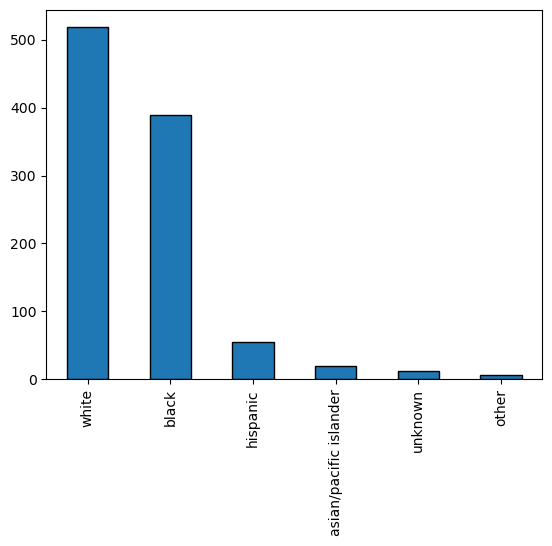

In [38]:
hist_counts.plot(kind='bar')
plt.show()

### Histograms

Histograms are a nifty way to display quantitative information. The x-axis is typically a quantitative variable of interest, and the y-axis is generally a frequency. Plot a histogram, and then experiment with the bin sizes.

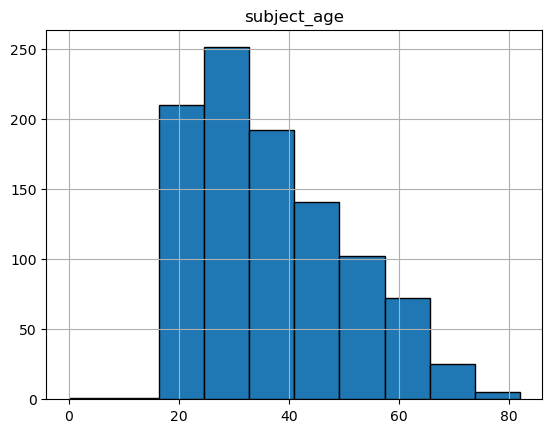

In [39]:
pandas_stops.hist("subject_age");

### Line Plots

Line plots are generally used to relate two variables to one another. They can be useful when trying to infer relationships between variables, visualize simple regressions, and get a general sense of the "spread" of your data.

In this case, we will use a line plot to visualize the relationship of average subject age over time.

**Note:** The first two rows in the code cell below are a bit more complex, as we're trying to create a column of just the year and then aggregate the data based on that. Don't worry too much about understanding it! Just focus on how we actually plot the line in the middle of the cell.

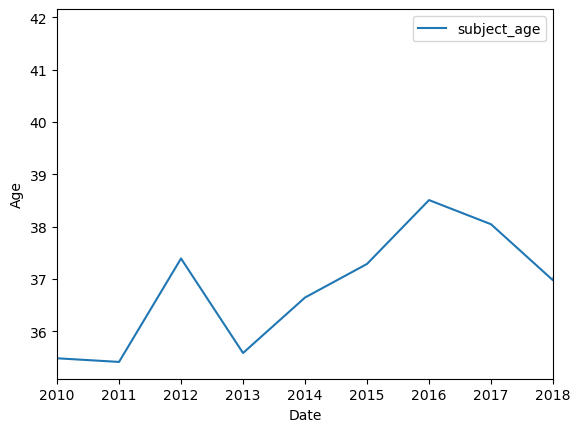

In [40]:
pandas_stops['year'] = [datetime.strptime(x, '%Y-%m-%d').year for x in pandas_stops['date']]
average_per_date = pandas_stops.groupby("year").mean("age").reset_index()

# The code below plots the line
average_per_date.plot.line(x ='year', y ='subject_age')

# Stylizing the graph -- adding axes labels and adjusting the range of the x-axis
plt.xlabel("Date")
plt.ylabel("Age")
plt.xlim([2010, 2018])
plt.show()

## Boxplots

Boxplots can be used to get a general idea of the spread of your data, and are especially useful if you need to compare across more than two categories.

Let's use a boxplot to show the distribution of ages of those stopped in traffic stops in the dataset, found in the column "subject_age", when arrests are and are not made.

We can use the by keyword to determine the column we would like to group by. In this case, we group by the column "arrest_made".

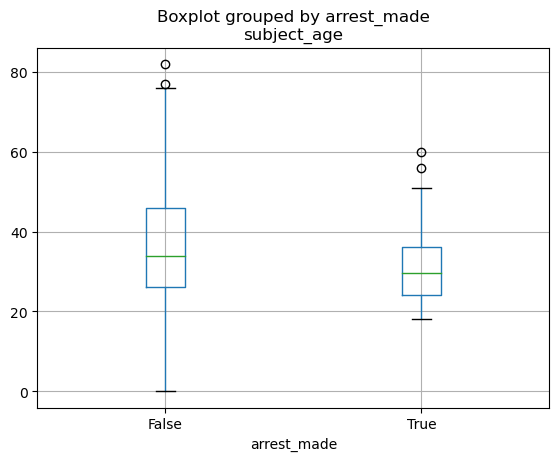

In [41]:
pandas_stops.boxplot(column = 'subject_age', by = 'arrest_made');

✅  Now that we have seen how to use a boxplot, try creating a two boxplots to visualize and compare the distribution of ages, found in the column "subject_age", groupled by the sex of those stopped in the traffic stops, found in the column "subject_sex".

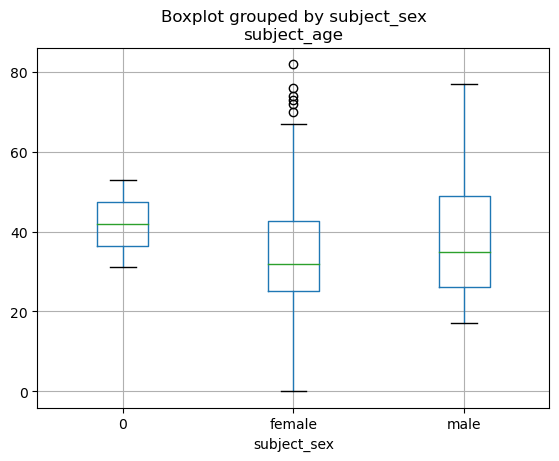

In [42]:
## SOLUTION ##
pandas_stops.boxplot(column = 'subject_age', by = 'subject_sex');